In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/clusterfs/NSDS_data/franklabdata/dataset1'

with open('%s/position.pkl' % path, 'rb') as f:
        position_df = pickle.load(f)

mask = position_df['position_x'].notna()
position_df = position_df[mask]

In [7]:
centers = {
    'maze_end_1': (79.910, 216.720),  # Top-left arm
    'maze_end_2': (92.693, 42.345),   # Bottom-left arm
    'maze_end_3': (31.340, 126.110),  # Middle-left arm
    'maze_end_4': (183.718, 217.713), # Top-right arm
    'maze_end_5': (183.784, 45.375),  # Bottom-right arm
    'maze_end_6': (231.338, 136.281)  # Middle-right arm
}
R = 15

x_positions = np.array(position_df['position_x'])
y_positions = np.array(position_df['position_y'])

In [8]:
def is_in_well(x, y, center, R):
    cx, cy = center
    return (cx - R <= x <= cx + R) and (cy - R <= y <= cy + R)

all_in_well = []
for i, (x,y) in enumerate(zip(x_positions, y_positions)):
    in_any_well = False 

    for well, center in centers.items():
        if is_in_well(x, y, center, R):
            in_any_well = True
    all_in_well.append(in_any_well)

all_in_well = np.array(all_in_well).astype(int)

changes = np.diff(all_in_well) # a 1 means they've entered a well, a -1 means they've left a well
start_times = np.squeeze(np.argwhere(changes == -1)) # Therefore, a trial begins when they leave a well
end_times = np.squeeze(np.argwhere(changes == 1))    # And that trial ends when they enter the next well

# Clean it up, make sure it fits.
if start_times[0] > end_times[0]:
    end_times = end_times[1:]

if start_times.size > end_times.size:
    start_times = start_times[:end_times.size]

elif end_times.size > start_times.size:
    end_times = end_times[:start_times.size]

In [9]:
# Visualization
colors = []
sizes = []
for j in range(x_positions.size):
    if j in start_times:
        colors.append("green")
        sizes.append(50)
    elif j in end_times:
        colors.append("red")
        sizes.append(50)
    else:
        colors.append("blue")
        sizes.append(1)

colors = np.array(colors)
sizes = np.array(sizes)

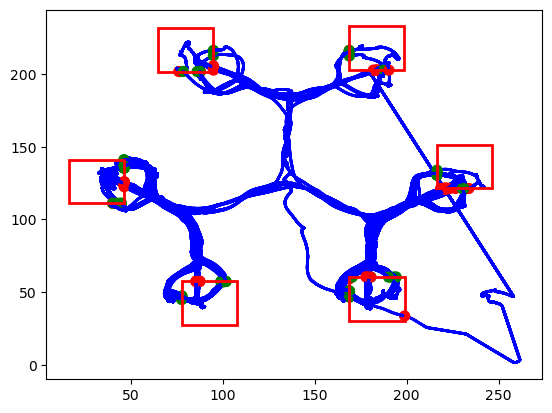

In [10]:
frac = 1 #0.027
select = np.arange(int(x_positions.size * frac))

plt.scatter(x_positions[select], y_positions[select], c=colors[select], s=sizes[select])

for name, (x, y) in centers.items():
    plt.gca().add_patch(plt.Rectangle((x - R, y - R), 2*R, 2*R, fill=False, edgecolor='red', lw=2))
plt.show()